In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import heapq

In [25]:
class Vertex:
    def __init__(self,x_coord,y_coord):
        self.x=x_coord # x_cord of vertex
        self.y=y_coord # y_cord of vertex
        self.d=float('inf') #distance from source
        self.parent_x=None
        self.parent_y=None
        self.processed=False
        self.index_in_queue=None 

In [26]:
def get_neighbors(mat,r,c):
    shape=mat.shape
    neighbors=[]
    if r > 0 and not mat[r-1][c].processed: #if within the image and not processed append into neighbours array
         neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed:
            neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed:
            neighbors.append(mat[r][c+1])
    return neighbors

In [27]:
def reheap_up(queue, index):
    if index <= 0:
        return queue
    p_index=(index-1)//2
    if queue[index].d < queue[p_index].d:
            queue[index], queue[p_index]=queue[p_index], queue[index]
            queue[index].index_in_queue=index
            queue[p_index].index_in_queue=p_index
            quque = reheap_up(queue, p_index)
    return queue

def reheap_down(queue, index):
    length=len(queue)
    lc_index=2*index+1
    rc_index=lc_index+1
    if lc_index >= length:
        return queue
    if lc_index < length and rc_index >= length: #just left child
        if queue[index].d > queue[lc_index].d:
            queue[index], queue[lc_index]=queue[lc_index], queue[index]
            queue[index].index_in_queue=index
            queue[lc_index].index_in_queue=lc_index
            queue = reheap_down(queue, lc_index)
    else:
        small = lc_index
        if queue[lc_index].d > queue[rc_index].d:
            small = rc_index
        if queue[small].d < queue[index].d:
            queue[index],queue[small]=queue[small],queue[index]
            queue[index].index_in_queue=index
            queue[small].index_in_queue=small
            queue = reheap_down(queue, small)
    return queue

#Calculating eucledian distance btw two nodes .1 is added to ensure that distance is non zero value

def get_distance(img,u,v):
    return 0.1 + (float(img[v][0])-float(img[u][0]))**2+(float(img[v][1])-float(img[u][1]))**2+(float(img[v][2])-float(img[u][2]))**2

#Function used to visualize the path

def drawPath(img, path, thickness = 1):
    '''path contains all the cordinates of vertexes'''
    x0,y0=path[0]
    for vertex in path[1:]:
        x1,y1=vertex
        cv2.line(img,(x0,y0),(x1,y1),(255,0,0),thickness)
        x0,y0=vertex

In [28]:
def find_shortest_path(img,src,dst):
    pq=[] #min-heap priority queue
    source_x=src[0]
    source_y=src[1]
    dest_x=dst[0]
    dest_y=dst[1]
    imagerows,imagecols=img.shape[0],img.shape[1]
    matrix = np.full((imagerows, imagecols), None) #Creates an empty 2d numpy array
    for r in range(imagerows):
        for c in range(imagecols):
            matrix[r][c]=Vertex(c,r)#Constructor call
            matrix[r][c].index_in_queue=len(pq)
            pq.append(matrix[r][c])
    matrix[source_y][source_x].d=0
    pq=reheap_up(pq, matrix[source_y][source_x].index_in_queue)
    
    while len(pq) > 0:
        u=pq[0]
        u.processed=True
        pq[0]=pq[-1] #Pop gives last element, so we exchange the first element with the last element
        pq[0].index_in_queue=0
        pq.pop()
        pq=reheap_down(pq,0)
        #Dijkistra algorithm 
        neighbors = get_neighbors(matrix,u.y,u.x)
        for v in neighbors:
            dist=get_distance(img,(u.y,u.x),(v.y,v.x))
            if u.d + dist < v.d:
                v.d = u.d+dist
                v.parent_x=u.x
                v.parent_y=u.y
                idx=v.index_in_queue
                pq=reheap_down(pq,idx)
                pq=reheap_up(pq,idx)
                          
    path=[]
    d1=matrix[dest_y][dest_x]
    path.append((dest_x,dest_y))
    while(d1.y!=source_y or d1.x!=source_x):
        path.append((d1.x,d1.y))
        d1=matrix[d1.parent_y][d1.parent_x]

        
    path.append((source_x,source_y))
    return path

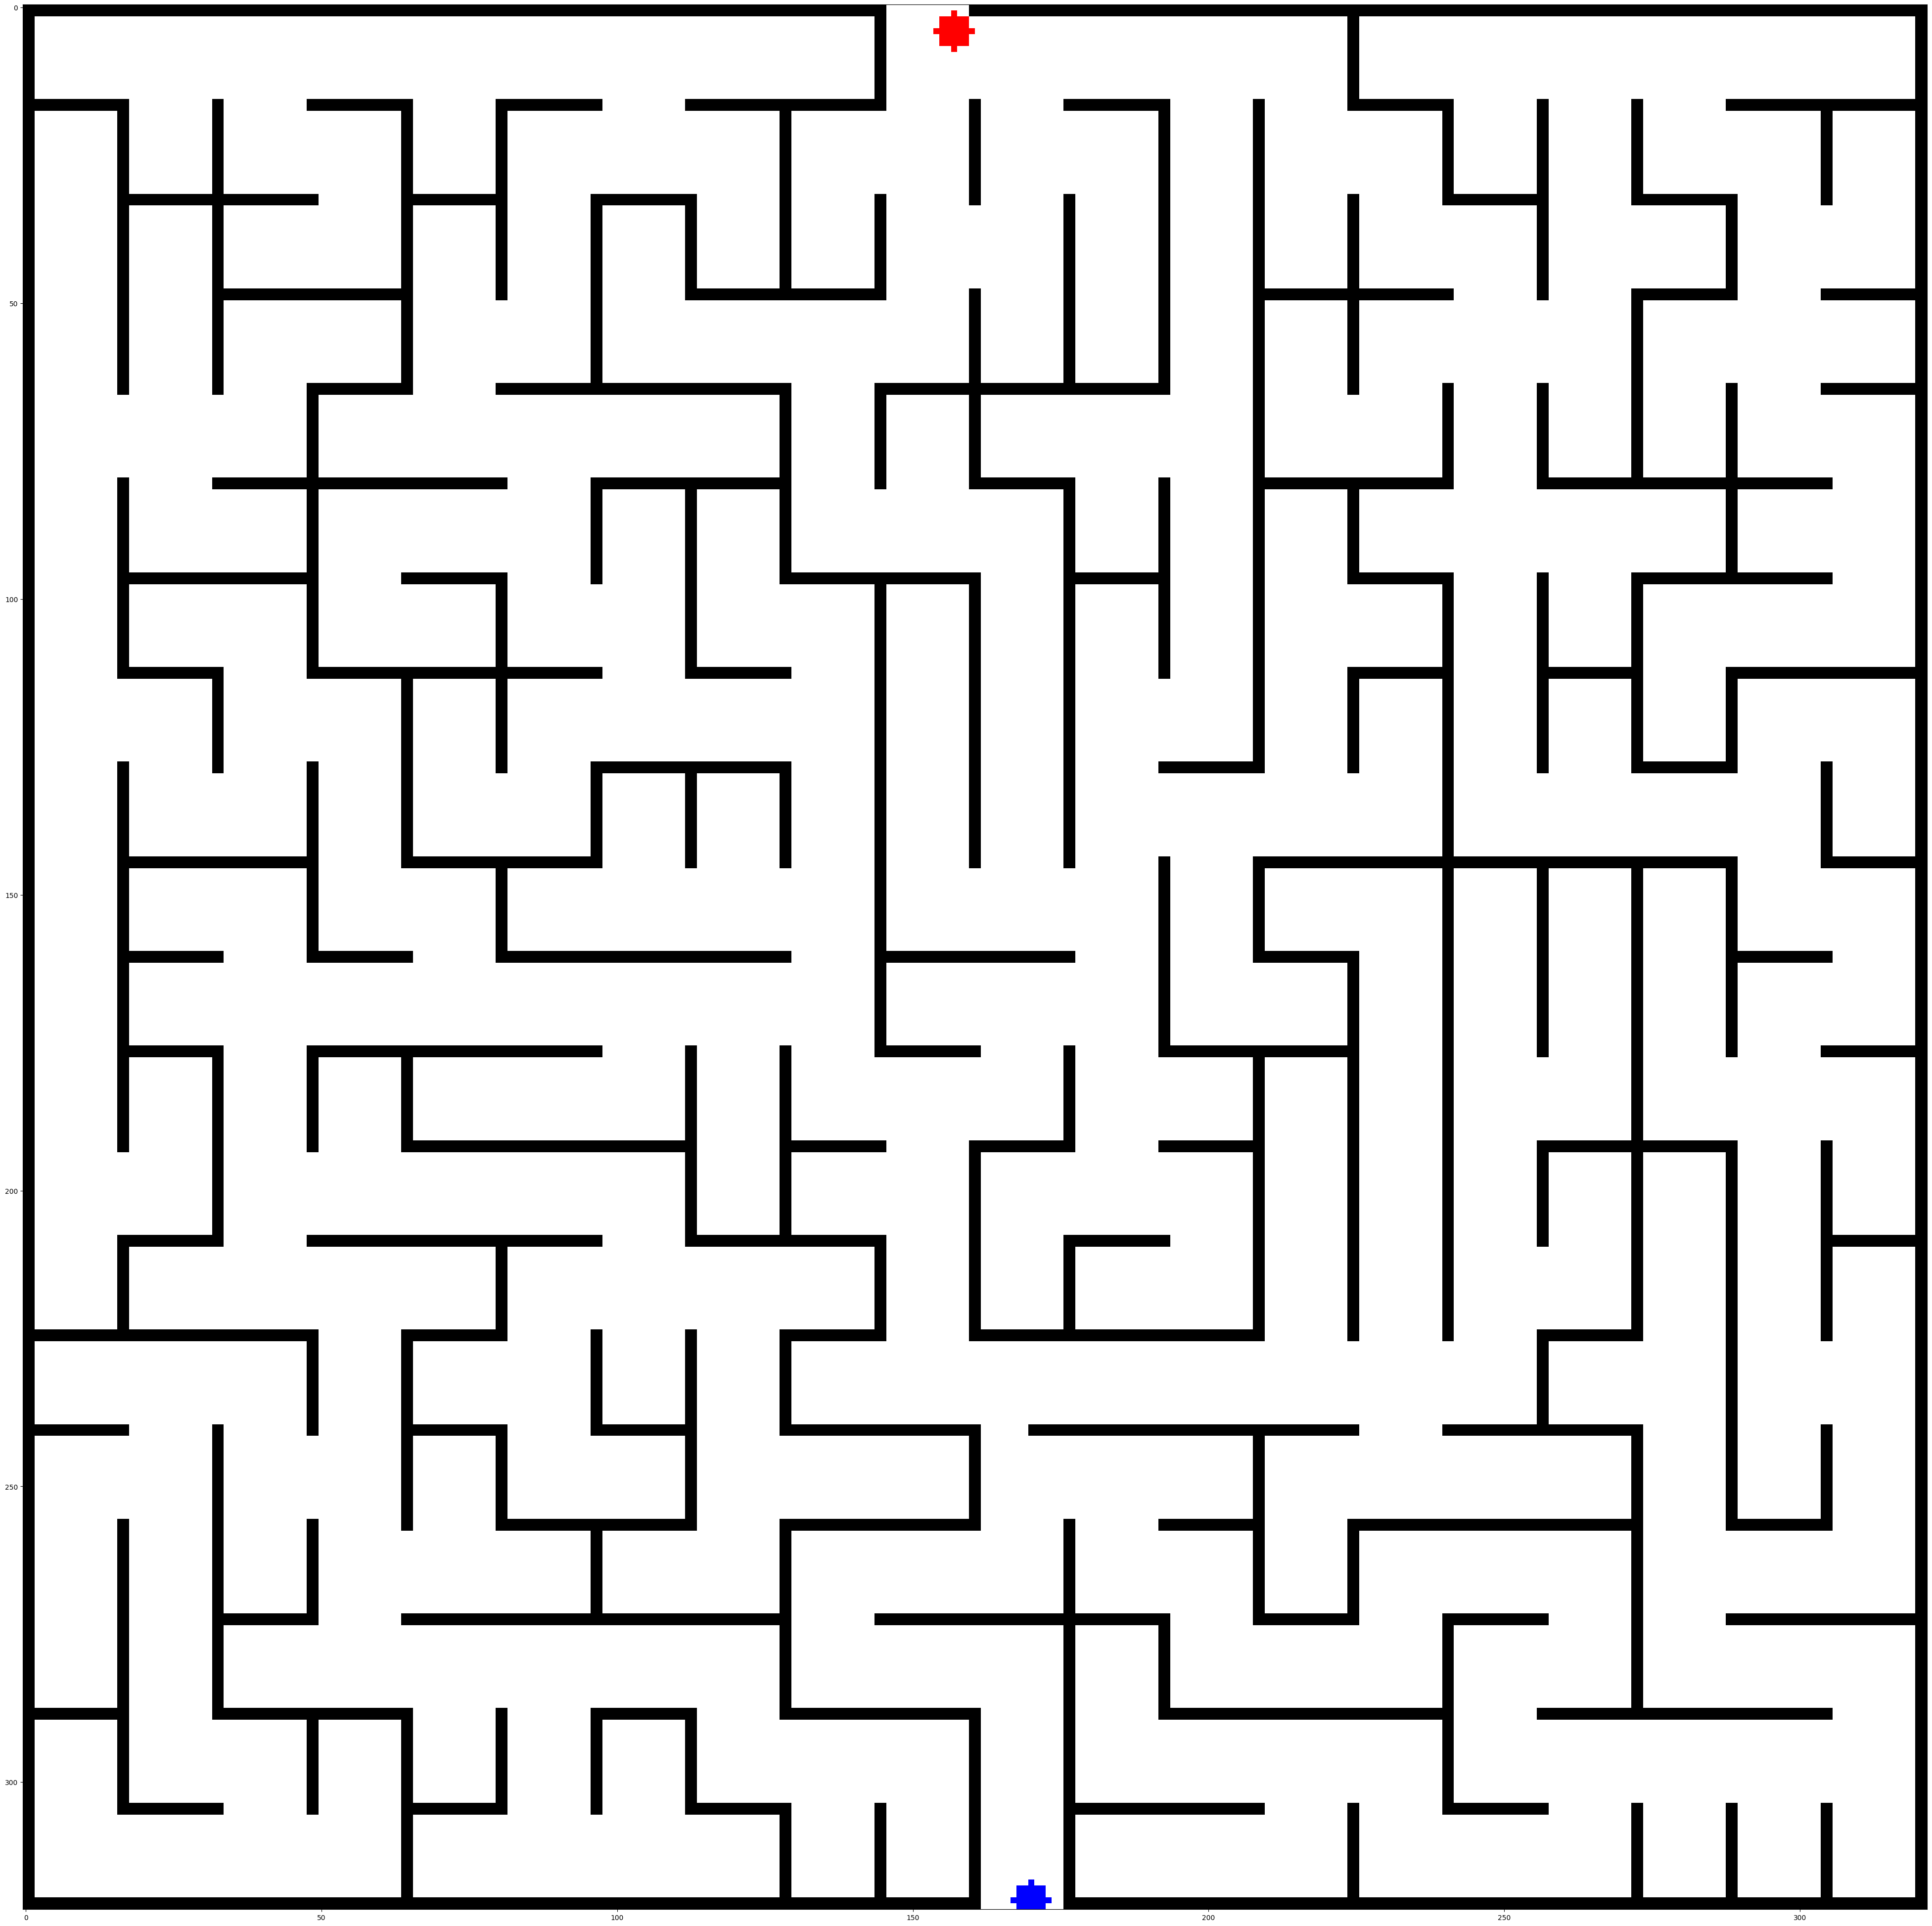

In [29]:
img = cv2.imread('maze.png')
#Let's visualize the image by drawing circles at entry and exit point
cv2.circle(img, (157,4), 3, (255,0,0), -1) 
cv2.circle(img, (170,320), 3, (0,0,255), -1) 
plt.figure(figsize=(50,50))
plt.imshow(img)
plt.show()

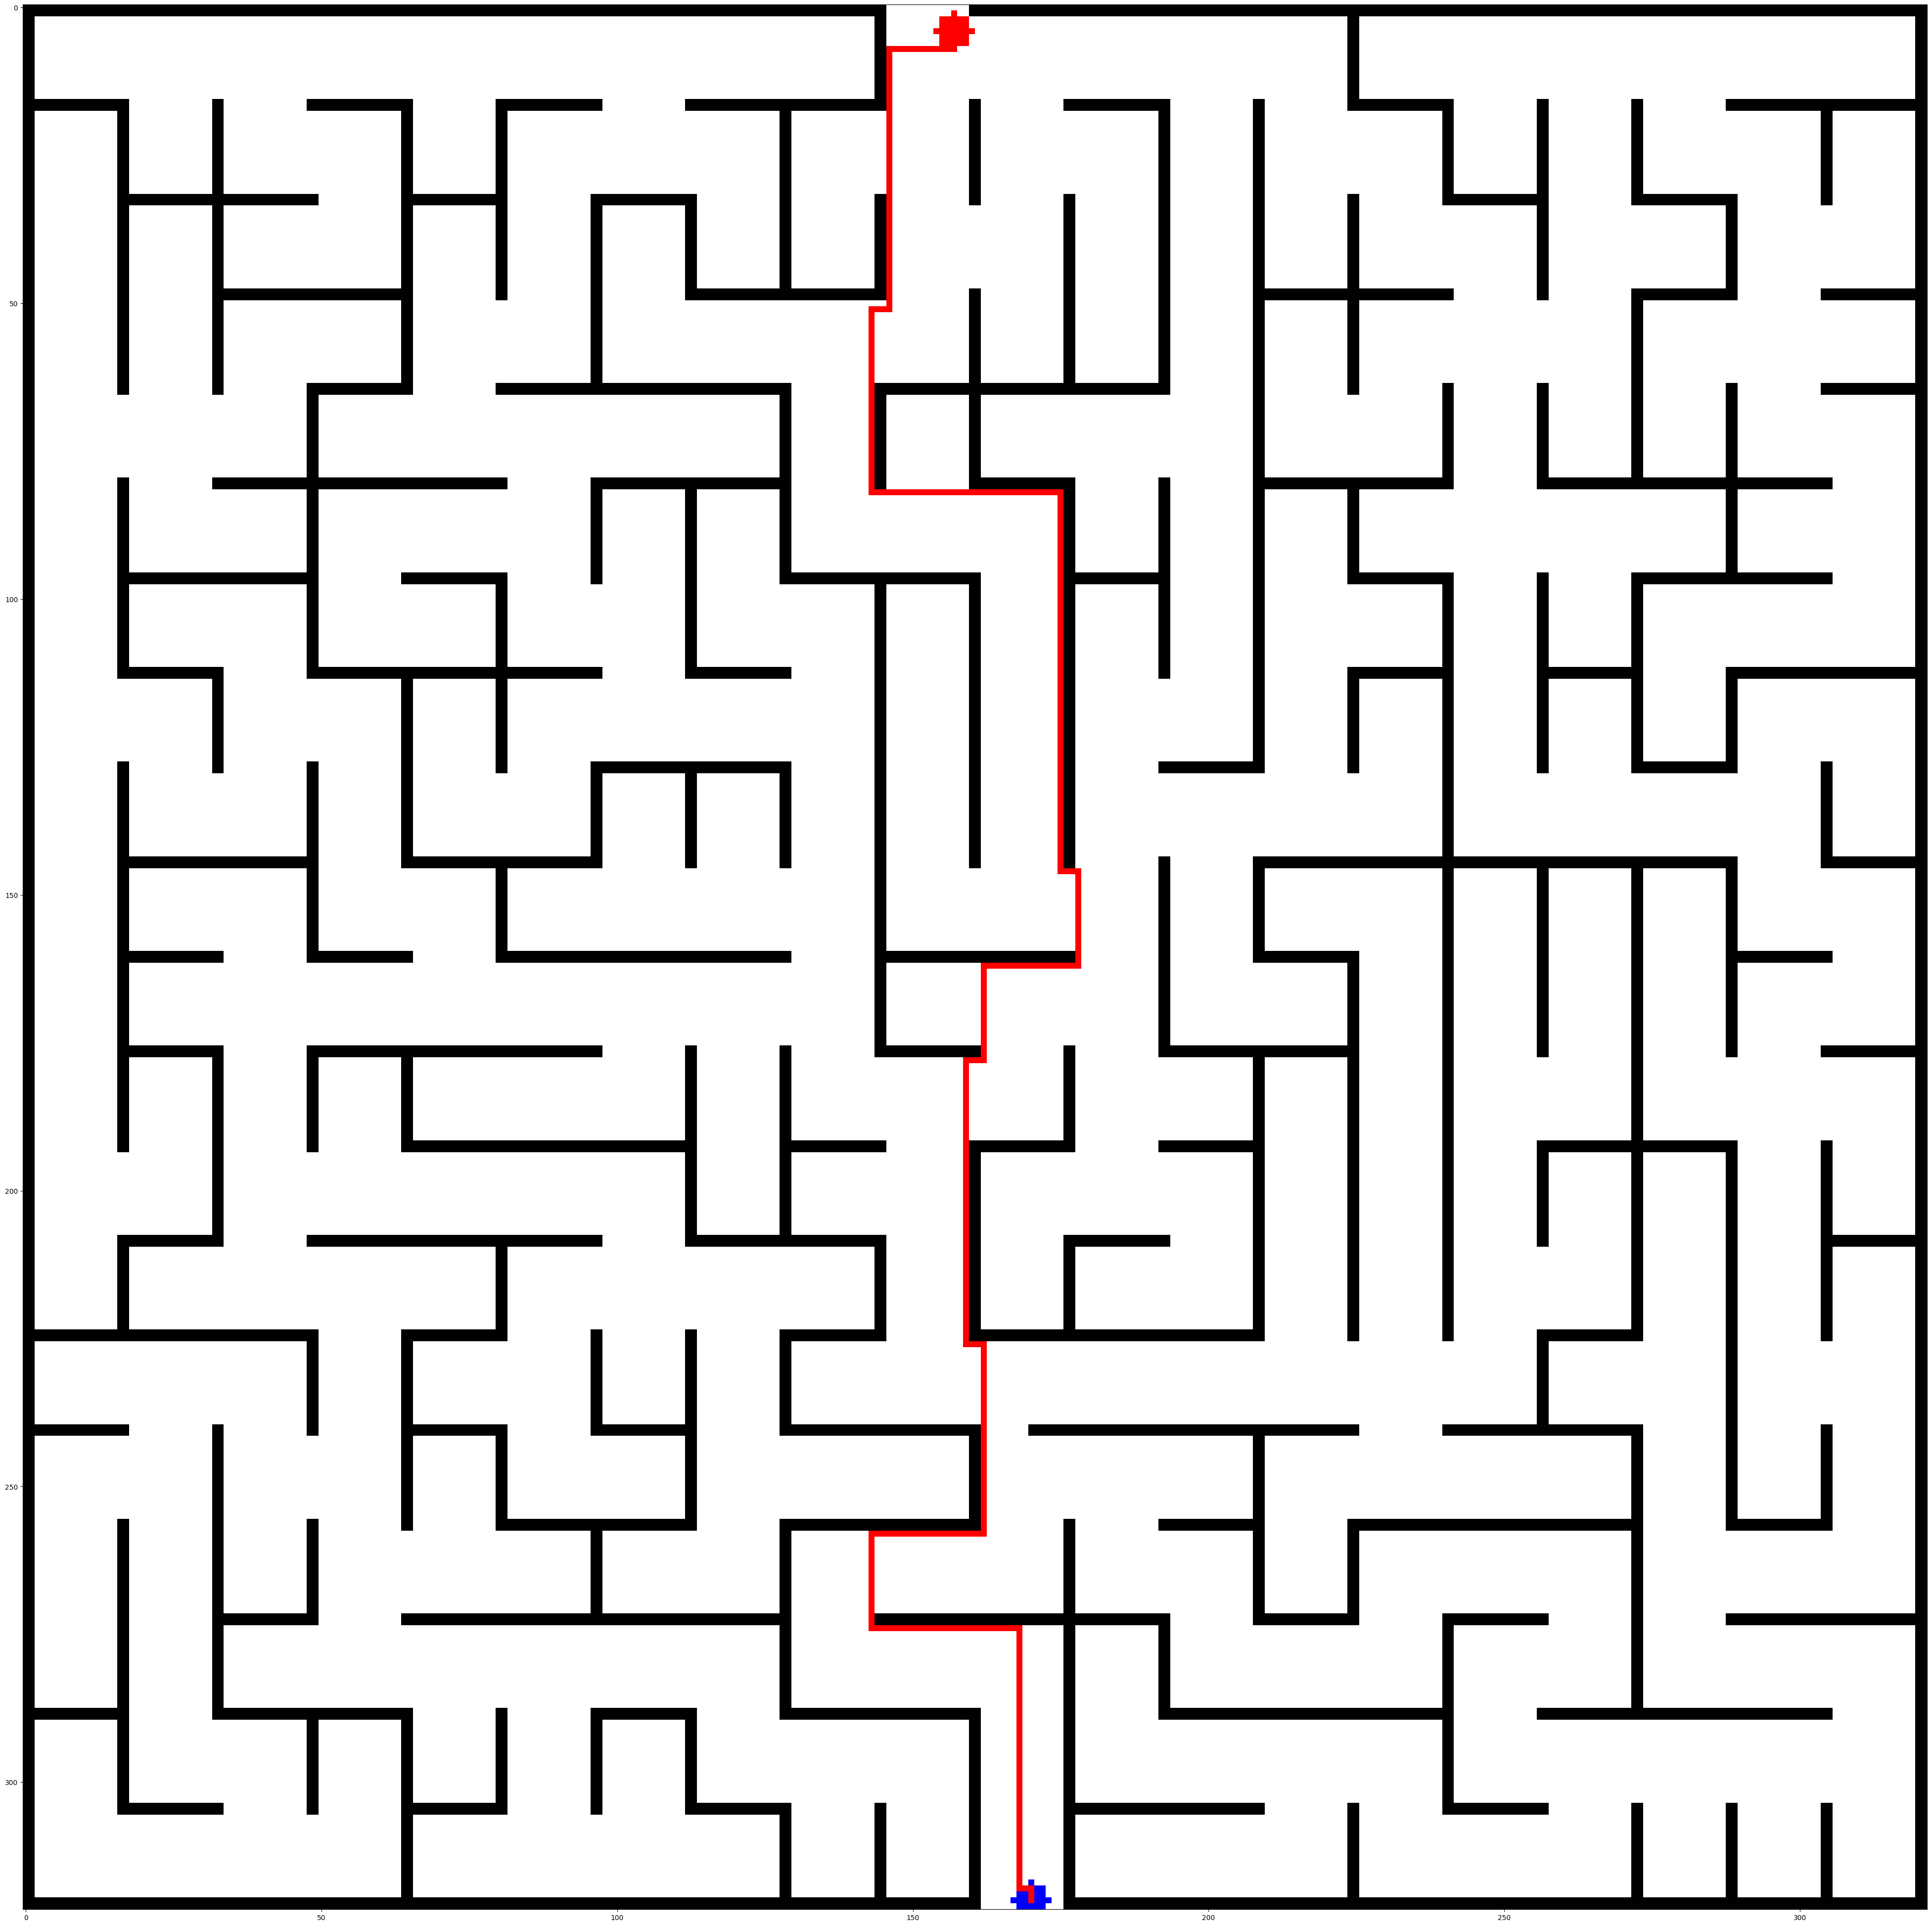

In [30]:
img = cv2.imread('maze.png') 
cv2.circle(img, (157,4), 3, (255,0,0), -1) 
cv2.circle(img, (170,320), 3, (0,0,255), -1) 
p = find_shortest_path(img, (170,320), (157,4))
drawPath(img,p)
plt.figure(figsize=(50,50))
plt.imshow(img) 
plt.show()